# ETL

Importamos las librerias necesarias para el desarrollo del analisis exploratorio.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importamos el dataset.

In [ ]:
df = pd.read_pickle('/content/drive/MyDrive/Yelp/business.pkl')

Visualizamos que se cargarna correctamente los datos

In [ ]:
df.head(5)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,NaN,63123,38.551126,-90.335695,3.0,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,NaN,85711,32.223236,-110.880452,3.5,22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,MO,18054,40.338183,-75.471659,4.5,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Realizamos un .info del dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150346 entries, 0 to 150345
Data columns (total 28 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   business_id   150346 non-null  object
 1   name          150346 non-null  object
 2   address       150346 non-null  object
 3   city          150346 non-null  object
 4   state         150343 non-null  object
 5   postal_code   150346 non-null  object
 6   latitude      150346 non-null  object
 7   longitude     150346 non-null  object
 8   stars         150346 non-null  object
 9   review_count  150346 non-null  object
 10  is_open       150346 non-null  object
 11  attributes    136602 non-null  object
 12  categories    150243 non-null  object
 13  hours         127123 non-null  object
 14  business_id   5 non-null       object
 15  name          5 non-null       object
 16  address       5 non-null       object
 17  city          5 non-null       object
 18  state         5 non-null

E un dataset con 28 columnas y 150346 registros. Al parecer el dataset tiene las columnas duplicadas y la ultima repeticion de estas columnas al parecer solo tienen 5 datos no nulos, por lo que procedemos a revisar estas ultimas columnas para revisar los datos.  

Miramos con .isna cuales registros de business:id son nulos, en la tabla de interactiva revisamos cuales son los registros que tienen ambas columnas falsas

In [ ]:
df['business_id'].isna()

,business_id,business_id
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True
...,...,...
150341,False,True
150342,False,True
150343,False,True
150344,False,True


Ceamos una lista con los indices de aquellas ccolumnas que tenian falso en ambas columnas y con .iloc revisamos las columnas.

In [ ]:
indices_a_ver = [590, 613, 978, 1296, 1543]
df.iloc[indices_a_ver]

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
590,6_Zf2QsRHCH1RhbzA9inyw,Starbucks,8602 Hillsborough Ave,Tampa,LA,33615,27.99637,-82.580954,3.0,56,...,LA,33615,27.99637,-82.580954,3.0,56,1,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Coffee & Tea, Food","{'Monday': '5:30-21:0', 'Tuesday': '5:30-21:0'..."
613,Iipfa9Kaac9XH5Vo8GQwvg,Starbucks,5956 153 Avenue,Edmonton,PA,T5Y 2W1,53.616147,-113.432424,3.5,10,...,PA,T5Y 2W1,53.616147,-113.432424,3.5,10,1,"{'BusinessParking': '{'garage': False, 'street...","Coffee & Tea, Food","{'Monday': '5:30-22:0', 'Tuesday': '5:30-22:0'..."
978,oY6osC4Ch3PvguA7D1hh_w,Starbucks,1251 Route 130 S,Cinnaminson,AZ,08077,40.000157,-74.987313,4.5,7,...,AZ,08077,40.000157,-74.987313,4.5,7,1,"{'WiFi': 'u'free'', 'BusinessParking': '{'gara...","Coffee & Tea, Food","{'Monday': '5:30-20:0', 'Tuesday': '5:30-20:0'..."
1296,pxuMxh5oC7W-PDN9wwvozg,Starbucks,219 N Center St,Reno,FL,89501,39.527772,-119.812518,3.0,44,...,FL,89501,39.527772,-119.812518,3.0,44,0,"{'BikeParking': 'False', 'Caters': 'False', 'O...","Coffee & Tea, Food","{'Monday': '5:30-19:0', 'Tuesday': '5:30-19:0'..."
1543,lo2VbA7Lwzu3i23pQpmzlw,Starbucks,"1125 S Black Horse Pike, Space 575",Gloucester Township,NJ,08012,39.78403,-75.05207,3.0,15,...,NJ,08012,39.78403,-75.05207,3.0,15,1,"{'BikeParking': 'True', 'RestaurantsPriceRange...","Food, Coffee & Tea","{'Monday': '0:0-0:0', 'Tuesday': '10:30-20:0',..."


Eliminamos las columnas duplicadas

In [ ]:
df = df.loc[:, ~df.columns.duplicated()]

Revisamos que se haya realizado correctamente la accion anterior

In [ ]:
df.head(5)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,NaN,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,NaN,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,MO,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


Hacemos un .info nuevamente para revisar como quedo el dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   business_id   150346 non-null  object
 1   name          150346 non-null  object
 2   address       150346 non-null  object
 3   city          150346 non-null  object
 4   state         150343 non-null  object
 5   postal_code   150346 non-null  object
 6   latitude      150346 non-null  object
 7   longitude     150346 non-null  object
 8   stars         150346 non-null  object
 9   review_count  150346 non-null  object
 10  is_open       150346 non-null  object
 11  attributes    136602 non-null  object
 12  categories    150243 non-null  object
 13  hours         127123 non-null  object
dtypes: object(14)
memory usage: 17.2+ MB


El dataset quedo con 14 columnas y 150346 registros

Al revisar la columna de attrubutes vemos que los registros de las columnas constan de diccionarios, para ello creamos una funcion para separar los regitros en varias columnas y aquellos registros que no cuenten con datos se reemplazen con NaN

In [ ]:
from numpy import NaN
def separar_attributes(row):
    result = {}
    try:
        data = pd.Series(row).to_dict()
        for key, value in data.items():
            if isinstance(value, dict):
                result.update(value)
            else:
                result[key] = value
        return pd.Series(result)
    except (AttributeError, ValueError):
        return pd.Series()

df_expanded = df['attributes'].apply(separar_attributes)
df_expanded.fillna(value= NaN, inplace=True)
df = pd.concat([df, df_expanded], axis=1)

Hacemos un .info para revisar como quedo el dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150346 entries, 0 to 150345
Data columns (total 53 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   business_id                 150346 non-null  object
 1   name                        150346 non-null  object
 2   address                     150346 non-null  object
 3   city                        150346 non-null  object
 4   state                       150343 non-null  object
 5   postal_code                 150346 non-null  object
 6   latitude                    150346 non-null  object
 7   longitude                   150346 non-null  object
 8   stars                       150346 non-null  object
 9   review_count                150346 non-null  object
 10  is_open                     150346 non-null  object
 11  attributes                  136602 non-null  object
 12  categories                  150243 non-null  object
 13  hours                       1

Revisamos los primeros 5 registros del dataset

In [ ]:
df.head(5)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,AcceptsInsurance,BestNights,BYOB,Corkage,BYOBCorkage,HairSpecializesIn,Open24Hours,RestaurantsCounterService,AgesAllowed,DietaryRestrictions
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,NaN,63123,38.551126,-90.335695,3.0,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,NaN,85711,32.223236,-110.880452,3.5,22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,MO,18054,40.338183,-75.471659,4.5,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Debido a que al separar la columna de attributes quedo el datset mas grande, se decide realizar una tabla adicional que contenga todas estas columnas de attributes, para tener un archivo mas ligero

In [ ]:
df_attributes = df[['business_id', 'ByAppointmentOnly', 'BusinessAcceptsCreditCards', 'BikeParking', 'RestaurantsPriceRange2',
                    'CoatCheck', 'RestaurantsTakeOut', 'RestaurantsDelivery', 'Caters', 'WiFi', 'BusinessParking',
                    'WheelchairAccessible', 'HappyHour', 'OutdoorSeating', 'HasTV', 'RestaurantsReservations',
                    'DogsAllowed', 'Alcohol', 'GoodForKids', 'RestaurantsAttire', 'Ambience', 'RestaurantsTableService',
                    'RestaurantsGoodForGroups', 'DriveThru', 'NoiseLevel', 'GoodForMeal', 'BusinessAcceptsBitcoin',
                    'Smoking', 'Music', 'GoodForDancing', 'AcceptsInsurance', 'BestNights', 'BYOB', 'Corkage',
                    'BYOBCorkage', 'HairSpecializesIn', 'Open24Hours', 'RestaurantsCounterService', 'AgesAllowed',
                    'DietaryRestrictions']]

Revisamos como queda la nueva tabla

In [ ]:
df_attributes

,business_id,ByAppointmentOnly,BusinessAcceptsCreditCards,BikeParking,RestaurantsPriceRange2,CoatCheck,RestaurantsTakeOut,RestaurantsDelivery,Caters,WiFi,...,AcceptsInsurance,BestNights,BYOB,Corkage,BYOBCorkage,HairSpecializesIn,Open24Hours,RestaurantsCounterService,AgesAllowed,DietaryRestrictions
0,Pns2l4eNsfO8kk83dixA6A,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mpf3x-BjTdTEA3yCZrAYPw,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tUFrWirKiKi_TAnsVWINQQ,False,True,True,2,False,False,False,False,u'no',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MTSW4McQd7CbVtyjqoe9mw,False,False,True,1,NaN,True,False,True,u'free',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mWMc6_wTdE0EUBKIGXDVfA,NaN,True,True,NaN,NaN,True,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150341,IUQopTMmYQG-qRtBk-8QnA,False,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150342,c8GjPIOTGVmIemT7j5_SyQ,NaN,True,True,2,NaN,NaN,NaN,NaN,u'no',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150343,_QAMST-NrQobXduilWEqSw,NaN,True,NaN,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150344,mtGm22y5c2UHNXDFAjaPNw,NaN,True,True,4,NaN,None,None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Eliminamos las columnas obtenidasdel dataframe original, junto a la columna attributes

In [ ]:
df.drop(columns='attributes', inplace=True)

In [ ]:
columnas_a_eliminar = ['ByAppointmentOnly', 'BusinessAcceptsCreditCards', 'BikeParking', 'RestaurantsPriceRange2',
                       'CoatCheck', 'RestaurantsTakeOut', 'RestaurantsDelivery', 'Caters', 'WiFi', 'BusinessParking',
                       'WheelchairAccessible', 'HappyHour', 'OutdoorSeating', 'HasTV', 'RestaurantsReservations',
                       'DogsAllowed', 'Alcohol', 'GoodForKids', 'RestaurantsAttire', 'Ambience', 'RestaurantsTableService',
                       'RestaurantsGoodForGroups', 'DriveThru', 'NoiseLevel', 'GoodForMeal', 'BusinessAcceptsBitcoin',
                       'Smoking', 'Music', 'GoodForDancing', 'AcceptsInsurance', 'BestNights', 'BYOB', 'Corkage',
                       'BYOBCorkage', 'HairSpecializesIn', 'Open24Hours', 'RestaurantsCounterService', 'AgesAllowed',
                       'DietaryRestrictions']

In [ ]:
df.drop(columns= columnas_a_eliminar, inplace=True)

Realizamos nuevamente un .info para validar que estos cambios se hayan realizado correctamente

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150346 entries, 0 to 150345
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   business_id   150346 non-null  object
 1   name          150346 non-null  object
 2   address       150346 non-null  object
 3   city          150346 non-null  object
 4   state         150343 non-null  object
 5   postal_code   150346 non-null  object
 6   latitude      150346 non-null  object
 7   longitude     150346 non-null  object
 8   stars         150346 non-null  object
 9   review_count  150346 non-null  object
 10  is_open       150346 non-null  object
 11  categories    150243 non-null  object
 12  hours         127123 non-null  object
dtypes: object(13)
memory usage: 16.1+ MB


Continuamos con la columna hours la cual tambien presenta los registros como diccionarios por lo que procedemos a utilizar nuevamente la funcion creada para asi obtener una nueva tabla

In [ ]:
df_expanded2 = df['hours'].apply(separar_attributes)
df_expanded2.fillna(value= NaN, inplace=True)
df = pd.concat([df, df_expanded2], axis=1)

Revisamos que se haya implementado correctamente la funcion por medio de un .info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150346 entries, 0 to 150345
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   business_id   150346 non-null  object
 1   name          150346 non-null  object
 2   address       150346 non-null  object
 3   city          150346 non-null  object
 4   state         150343 non-null  object
 5   postal_code   150346 non-null  object
 6   latitude      150346 non-null  object
 7   longitude     150346 non-null  object
 8   stars         150346 non-null  object
 9   review_count  150346 non-null  object
 10  is_open       150346 non-null  object
 11  categories    150243 non-null  object
 12  hours         127123 non-null  object
 13  Monday        114474 non-null  object
 14  Tuesday       120631 non-null  object
 15  Wednesday     123771 non-null  object
 16  Thursday      125198 non-null  object
 17  Friday        124999 non-null  object
 18  Saturday      110770 non

Creamos una nueva tabla con las columnas obtenidas

In [ ]:
df_hours = df[['business_id','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

Se eliminan las columnas obtenidas del dataset original. Ademas eliminamos la columna de hours

In [ ]:
columnas_a_eliminar2 = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df.drop(columns= columnas_a_eliminar2, inplace=True)
df.drop(columns='hours', inplace=True)

Revisamos la nueva tabla obtenida

In [ ]:
df_hours.head(5)

,business_id,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,Pns2l4eNsfO8kk83dixA6A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mpf3x-BjTdTEA3yCZrAYPw,0:0-0:0,8:0-18:30,8:0-18:30,8:0-18:30,8:0-18:30,8:0-14:0,NaN
2,tUFrWirKiKi_TAnsVWINQQ,8:0-22:0,8:0-22:0,8:0-22:0,8:0-22:0,8:0-23:0,8:0-23:0,8:0-22:0
3,MTSW4McQd7CbVtyjqoe9mw,7:0-20:0,7:0-20:0,7:0-20:0,7:0-20:0,7:0-21:0,7:0-21:0,7:0-21:0
4,mWMc6_wTdE0EUBKIGXDVfA,NaN,NaN,14:0-22:0,16:0-22:0,12:0-22:0,12:0-22:0,12:0-18:0


Realizamos un .info para revidsar que se realizaran correctamente los cambios

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150346 entries, 0 to 150345
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   business_id   150346 non-null  object
 1   name          150346 non-null  object
 2   address       150346 non-null  object
 3   city          150346 non-null  object
 4   state         150343 non-null  object
 5   postal_code   150346 non-null  object
 6   latitude      150346 non-null  object
 7   longitude     150346 non-null  object
 8   stars         150346 non-null  object
 9   review_count  150346 non-null  object
 10  is_open       150346 non-null  object
 11  categories    150243 non-null  object
dtypes: object(12)
memory usage: 14.9+ MB


A continuacion realizaremos un explode en la columna de categories ya que esta presenta registros con listas por lo que es necesario separarlas

In [ ]:
df = df.explode('categories')

Se crea otra columna que tendra cada categoria y se unira por medio del business_id, separamos las categorias de cada registro que estan separadas por ', '

In [ ]:
df_categories = df[['business_id', 'categories']]

In [ ]:
df_categories['categories'] = df_categories['categories'].str.split(', ')

In [ ]:
df_categories = df_categories.explode('categories')

Revisamos la nueva tabla obtenida

In [ ]:
df_categories

,business_id,categories
0,Pns2l4eNsfO8kk83dixA6A,Doctors
0,Pns2l4eNsfO8kk83dixA6A,Traditional Chinese Medicine
0,Pns2l4eNsfO8kk83dixA6A,Naturopathic/Holistic
0,Pns2l4eNsfO8kk83dixA6A,Acupuncture
0,Pns2l4eNsfO8kk83dixA6A,Health & Medical
...,...,...
150344,mtGm22y5c2UHNXDFAjaPNw,Bikes
150345,jV_XOycEzSlTx-65W906pg,Beauty & Spas
150345,jV_XOycEzSlTx-65W906pg,Permanent Makeup
150345,jV_XOycEzSlTx-65W906pg,Piercing


Finalmente se elimina la columna categories del df original

In [ ]:
df.drop(columns='categories', inplace=True)

Ahora realizamos cambio de tipo de variables en el dataset df en las columnas stars y review_count

In [ ]:
df['stars'] =df['stars'].astype(float)
df['review_count'] =df['review_count'].astype(int)

# EDA

Realizamos un .info de los datasets

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150346 entries, 0 to 150345
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       150346 non-null  object 
 3   city          150346 non-null  object 
 4   state         150343 non-null  object 
 5   postal_code   150346 non-null  object 
 6   latitude      150346 non-null  object 
 7   longitude     150346 non-null  object 
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  is_open       150346 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 13.8+ MB


El dataset df tiene 10 columnas y 150346 registros. Ademas vemos que ninguna de la columna cuenta con datos nulos. Las columnas stars y review_count son de tipo numerica donde la primera es float y la segunda es de tipo int, el resto de las columnas son de tipo object.

In [ ]:
df_attributes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150346 entries, 0 to 150345
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   business_id                 150346 non-null  object
 1   ByAppointmentOnly           42339 non-null   object
 2   BusinessAcceptsCreditCards  119765 non-null  object
 3   BikeParking                 72638 non-null   object
 4   RestaurantsPriceRange2      85314 non-null   object
 5   CoatCheck                   5584 non-null    object
 6   RestaurantsTakeOut          59857 non-null   object
 7   RestaurantsDelivery         56282 non-null   object
 8   Caters                      40127 non-null   object
 9   WiFi                        56914 non-null   object
 10  BusinessParking             91085 non-null   object
 11  WheelchairAccessible        28953 non-null   object
 12  HappyHour                   15171 non-null   object
 13  OutdoorSeating              4

El dataset df_attributes cuenta con 40 columnas con 150346 registros. El dataset tiene una cantidad considerable de datos nulos. Todas las columnas son de tipo object.

In [ ]:
df_categories.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668695 entries, 0 to 150345
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   business_id  668695 non-null  object
 1   categories   668592 non-null  object
dtypes: object(2)
memory usage: 15.3+ MB


El dataset cuenta con 2 columnas y con 668695 registros. La columna cantegories cuenta con datos nulos. Todas las columnas son de tipo object.

In [ ]:
df_hours.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150346 entries, 0 to 150345
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   business_id  150346 non-null  object
 1   Monday       114474 non-null  object
 2   Tuesday      120631 non-null  object
 3   Wednesday    123771 non-null  object
 4   Thursday     125198 non-null  object
 5   Friday       124999 non-null  object
 6   Saturday     110770 non-null  object
 7   Sunday       81172 non-null   object
dtypes: object(8)
memory usage: 10.3+ MB


El dataset cuenta con 8 columnas y con 150346 registros. Las columnas cuentan con datos nulos menos la de business_id. Todas las columnas son de tipo object.

Revisamos cuantos datos nulos hay por columnas para cada dataset.

In [ ]:
df.isnull().sum()

business_id     0
name            0
address         0
city            0
state           3
postal_code     0
latitude        0
longitude       0
stars           0
review_count    0
is_open         0
dtype: int64

El dataset df no cuenta con datos nulos

In [ ]:
df_attributes.isnull().sum()

business_id                        0
ByAppointmentOnly             108007
BusinessAcceptsCreditCards     30581
BikeParking                    77708
RestaurantsPriceRange2         65032
CoatCheck                     144762
RestaurantsTakeOut             90489
RestaurantsDelivery            94064
Caters                        110219
WiFi                           93432
BusinessParking                59261
WheelchairAccessible          121393
HappyHour                     135175
OutdoorSeating                101544
HasTV                         105262
RestaurantsReservations       105099
DogsAllowed                   132062
Alcohol                       107157
GoodForKids                    96971
RestaurantsAttire             111091
Ambience                      106067
RestaurantsTableService       130364
RestaurantsGoodForGroups      106176
DriveThru                     142586
NoiseLevel                    112353
GoodForMeal                   121259
BusinessAcceptsBitcoin        132916
S

El dataset df_attibutes de manera general cuenta con muchos datos nulos

In [ ]:
df_categories.isnull().sum()

business_id      0
categories     103
dtype: int64

El dataset df_categories cuenta con 103 datos nulos

In [ ]:
df_hours.isnull().sum()

business_id        0
Monday         35872
Tuesday        29715
Wednesday      26575
Thursday       25148
Friday         25347
Saturday       39576
Sunday         69174
dtype: int64

El dataset df_hours presenta varios datos nulos en todas las columnas menos en la de business_id

Revisamos si hay datos duplicados.

In [ ]:
df[df.duplicated()]

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open


El dataset df no cuenta con datos duplicados

In [ ]:
df_attributes[df_attributes.duplicated()]

,business_id,ByAppointmentOnly,BusinessAcceptsCreditCards,BikeParking,RestaurantsPriceRange2,CoatCheck,RestaurantsTakeOut,RestaurantsDelivery,Caters,WiFi,...,AcceptsInsurance,BestNights,BYOB,Corkage,BYOBCorkage,HairSpecializesIn,Open24Hours,RestaurantsCounterService,AgesAllowed,DietaryRestrictions


El dataset df_attributes no cuenta con datos duplicados

In [ ]:
df_categories[df_categories.duplicated()]

,business_id,categories
766,3vTG6LQyr3obzfvrK1l1hA,Gas Stations
3529,5wnGMB8tXhNvGcbhPJeeVw,Gas Stations
14698,Ir4-CFGZDfloJkUMax13Og,Gas Stations
15361,alpF8d_veJy9Isk6f7wgRQ,Gas Stations
15510,I_Sxmx6puRYyLS51RtLqtQ,Gas Stations
25607,AV--_bzb6m-RqUfk269DBA,Gas Stations
35446,SO0dcsQP6I83i4QIZg0Y7A,Gas Stations
35882,F8H5zuu_eTx8KpmkgO5JAw,Gas Stations
40945,QZqNkjxX7xNg1RPFFVhB5g,Gas Stations
41126,60A570zht69eAj3Md81nsQ,Gas Stations


El dataset df_categories no cuenta con datos duplicados

In [ ]:
df_hours[df_hours.duplicated()]

,business_id,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday


El dataset df_hours no cuenta con datos duplicados

Se realiza un .describe del dataset df de las unicas variables de tipo numerico

In [ ]:
df.describe()

,stars,review_count
count,150346.000000,150346.000000
mean,3.596724,44.866561
std,0.974421,121.120136
min,1.000000,5.000000
25%,3.000000,8.000000
50%,3.500000,15.000000
75%,4.500000,37.000000
max,5.000000,7568.000000


Podemos ver que de manera general se recibe un puntaje promedio de 3,59 estrellas, ademas en promedio se realizan un total de 44 reviews aproximadamente

Ahora hacemos un describe de las columas con tipo de dato object.


In [ ]:
df.describe(include=object)

,business_id,name,address,city,state,postal_code,latitude,longitude,is_open
count,150346,150346,150346,150346,150343,150346,150346.000000,150346.000000,150346
unique,150346,114117,122844,1416,27,3362,135593.000000,131918.000000,2
top,Pns2l4eNsfO8kk83dixA6A,Starbucks,,Philadelphia,PA,93101,34.420334,-119.710749,1
freq,1,724,5127,14569,34039,1866,146.000000,146.000000,119698


Podemos ver que hay mas locales de Starbucks, la mayoria de locales de los datos son de la ciudad de Philadelphia, la mayoria de los establecimientos de este dataset se encuentran abiertos

In [ ]:
df_hours.describe(include=object)

,business_id,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
count,150346,114474,120631,123771,125198,124999,110770,81172
unique,150346,1315,1414,1403,1462,1538,1439,1291
top,Pns2l4eNsfO8kk83dixA6A,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0
freq,1,31362,7078,7084,7112,7100,7156,7016


se puede ver que la franja horaria en las que mas atienden  los locales del dataset es de 0:0 - 0:0 de manera general para todos los dias

In [ ]:
df_attributes.describe(include=object)

,business_id,ByAppointmentOnly,BusinessAcceptsCreditCards,BikeParking,RestaurantsPriceRange2,CoatCheck,RestaurantsTakeOut,RestaurantsDelivery,Caters,WiFi,...,AcceptsInsurance,BestNights,BYOB,Corkage,BYOBCorkage,HairSpecializesIn,Open24Hours,RestaurantsCounterService,AgesAllowed,DietaryRestrictions
count,150346,42339,119765,72638,85314,5584,59857,56282,40127,56914,...,5713,5694,4451,3553,1444,1065,39,19,129,31
unique,150346,3,3,3,5,3,3,3,3,7,...,3,115,3,3,7,158,2,2,3,11
top,Pns2l4eNsfO8kk83dixA6A,False,True,True,2,False,True,True,True,u'free',...,True,"{'monday': False, 'tuesday': False, 'friday': ...",False,False,'no',"{'straightperms': False, 'coloring': False, 'e...",False,True,u'allages',"{'dairy-free': False, 'gluten-free': True, 've..."
freq,1,26690,113667,55040,48581,5141,52943,32146,22337,27029,...,3938,950,3437,2446,730,123,20,16,77,12


Vemos algunos atrbutos que predominan como el aceptar tarjetas de credito, el tener parqueaderos de bicibletas, el tener repartidor, muchos de estos locales no estan abiertos la 24 horas, etc

In [ ]:
df_categories.describe(include=object)

,business_id,categories
count,668695,668592
unique,150346,1311
top,ytynqOUb3hjKeJfRj5Tshw,Restaurants
freq,36,52268


La categoria que mas se presenta es la de restaurantes

Importamos la libreia matplotlib para hacer graficos para el analisis de datos

In [ ]:
import matplotlib.pyplot  as plt

Creamos una funcion para crear graficos de barras para las variables de los dataframe donde nos muestre el top 10

In [ ]:
def plot_bar_chart(dataframe, column_name, top_n=10):
    value_counts = dataframe[column_name].value_counts().head(top_n)
    plt.figure(figsize=(10, 6))
    value_counts.plot(kind='bar')
    plt.title(f'Diagrama de barras para las {top_n} categorías más frecuentes en {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frecuencia')
    plt.show()

Primero revisamos la variable city

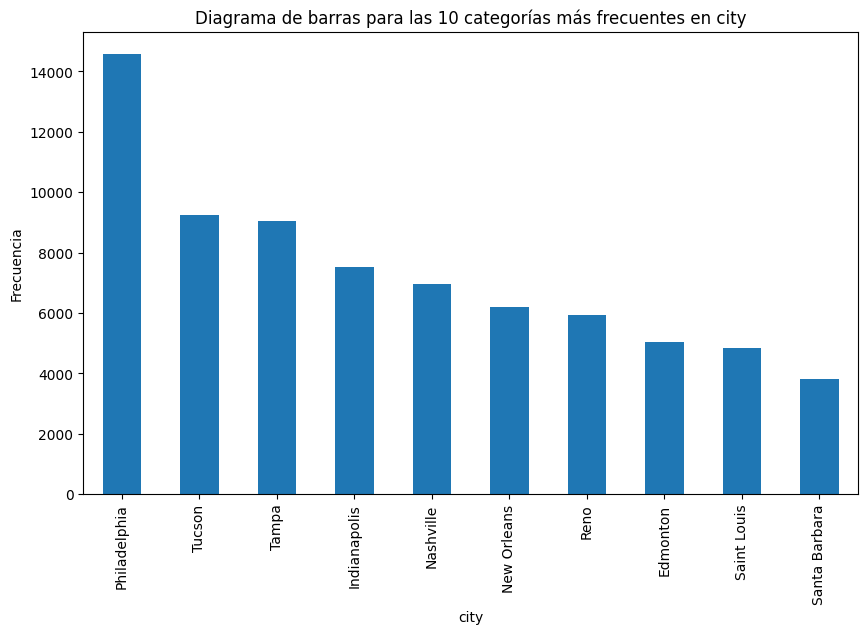

In [ ]:
plot_bar_chart(df, 'city', top_n=10)

Como se dijo anteriormente la ciudad que tiene mas locales de este dataset es philadelphia, seguida de tucson, tampa, indianapolis

Ahora revisamos la variable states

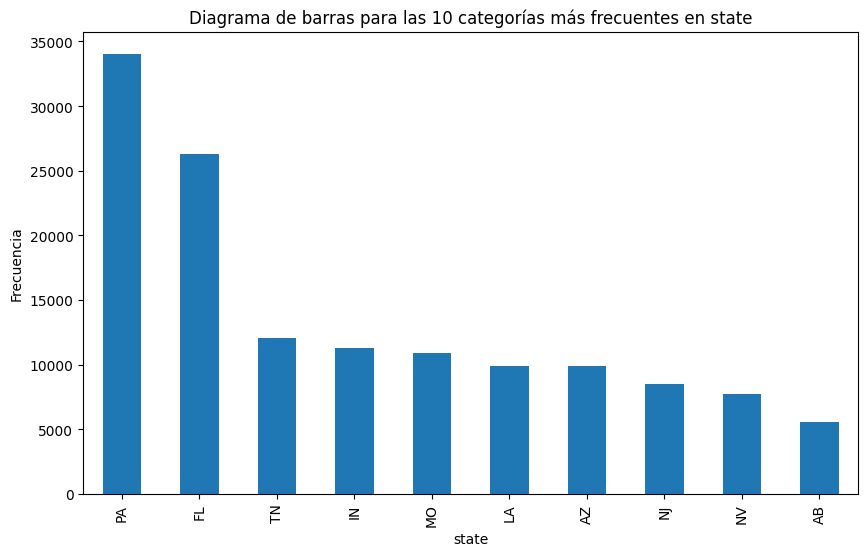

In [ ]:
plot_bar_chart(df, 'state', top_n=10)

Ahora revisamos la variable is_open

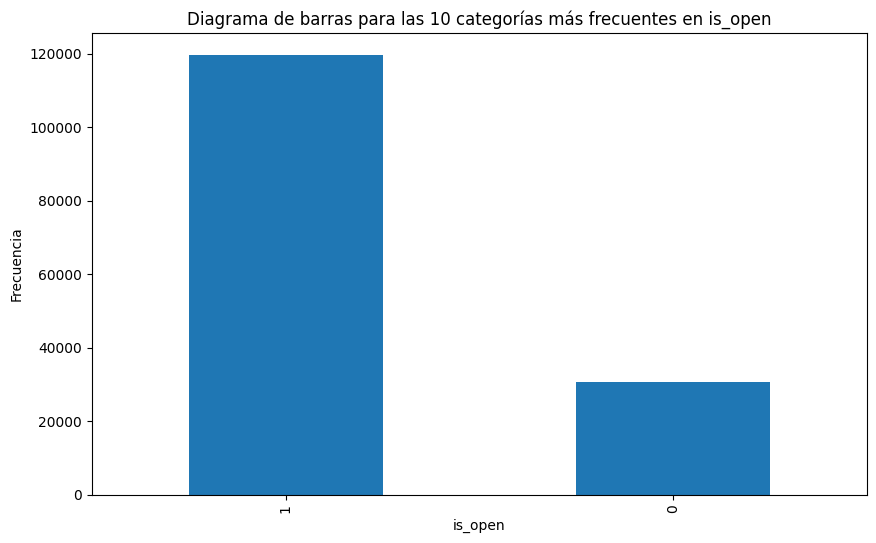

In [ ]:
plot_bar_chart(df, 'is_open', top_n=10)

Podemos ver que hay una cantidad considerable de locales de este dataset que estan abiertos